In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import configparser
import datetime as dt

import trosat.sunpos as sp
import modules.utils as utils

CONFIG = configparser.ConfigParser(interpolation=configparser.ExtendedInterpolation())
CONFIG.read("ConfigFile.ini")

['ConfigFile.ini']

In [2]:
input_file = "example-data/l1a_calibrated/ps113_GUV_000350_C_20180602.nc"

ds = xr.open_dataset(input_file)


In [8]:
flux_vars = [key for key in ds.keys() if key[-4:] == 'flux']
ds_corrected = ds.drop_vars(flux_vars)
ds_corrected

<xarray.Dataset>
Dimensions:              (time: 18000, ch: 18, scalar: 1)
Coordinates:
  * time                 (time) datetime64[ns] 2018-06-02T14:50:00.037000 ......
    wavelength           (ch) int64 305 340 380 412 443 ... 1020 1245 1550 1640
Dimensions without coordinates: ch, scalar
Data variables: (12/14)
    centroid_wavelength  (ch) float64 297.4 340.4 380.6 ... 1.55e+03 1.645e+03
    EsRoll               (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch              (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    BioShadeAngle        (time) float64 0.5906 0.5906 0.5906 ... 140.9 140.5
    BioShadeMode         (time) object 'Z' 'Z' 'Z' 'Z' 'Z' ... 'A' 'A' 'A' 'A'
    EsTemp               (time) float64 39.8 39.81 39.81 ... 39.81 39.81 39.79
    ...                   ...
    InsLatitude          (time) float64 26.53 26.53 26.53 ... 26.57 26.57 26.57
    InsLongitude         (time) float64 -16.94 -16.94 -16.94 ... -16.89 -16.89
    InsPitch             (time) float64 1.076 1.067 1.049 ... 1.017 1.056 1.095
    InsRoll              (time) float64 0.4199 0.4209 0.4268 ... 0.2074 0.201
    InsYaw               (time) float64 51.5 51.5 51.5 51.5 ... 53.0 53.03 53.09
    EarthSunDistance     (scalar) float64 1.014
Attributes: (12/16)
    pfx:                ps113
    instrument_serial:  000350
    instrument:         GUVis-3511 + BioSHADE + BioGPS
    instrument_id:      A201400022
    author:             Jonas Witthuhn (jonas.witthuhn@tropos.de)
    title:              Radiation data observed with the shadow-band radiomet...
    ...                 ...
    source:             Product derived with - shrad-pro (v1.0)
    source_files:       Origin files: ['example-data/raw/ps113_GUV_000350_C_1...
    generation_time:    2021-10-06 11:37:35 Z
    conventions:        CF-1.10
    license:            CC-BY-SA 3.0
    references:         https://doi.org/10.5194/amt-10-709-2017, https://doi....

In [4]:
ds

<xarray.Dataset>
Dimensions:              (time: 18000, ch: 18, scalar: 1)
Coordinates:
  * time                 (time) datetime64[ns] 2018-06-02T14:50:00.037000 ......
    wavelength           (ch) int64 ...
Dimensions without coordinates: ch, scalar
Data variables: (12/16)
    centroid_wavelength  (ch) float64 ...
    spectral_flux        (time, ch) float64 ...
    broadband_flux       (time) float64 934.3 930.1 934.5 ... 996.4 996.5 996.5
    EsRoll               (time) float64 ...
    EsPitch              (time) float64 ...
    BioShadeAngle        (time) float64 ...
    ...                   ...
    InsLatitude          (time) float64 ...
    InsLongitude         (time) float64 ...
    InsPitch             (time) float64 ...
    InsRoll              (time) float64 ...
    InsYaw               (time) float64 ...
    EarthSunDistance     (scalar) float64 ...
Attributes: (12/16)
    pfx:                ps113
    instrument_serial:  000350
    instrument:         GUVis-3511 + BioSHADE + BioGPS
    instrument_id:      A201400022
    author:             Jonas Witthuhn (jonas.witthuhn@tropos.de)
    title:              Radiation data observed with the shadow-band radiomet...
    ...                 ...
    source:             Product derived with - shrad-pro (v1.0)
    source_files:       Origin files: ['example-data/raw/ps113_GUV_000350_C_1...
    generation_time:    2021-10-06 11:37:35 Z
    conventions:        CF-1.10
    license:            CC-BY-SA 3.0
    references:         https://doi.org/10.5194/amt-10-709-2017, https://doi....

In [6]:
Files = ['../shrad-data/raw/ps113_GUV_000350_C_180602_1450.csv',
         '../shrad-data/raw/ps113_GUV_000350_C_180602_1500.csv']

DS1 = utils.load_rawdata_and_combine(Files,
                                     calib_file="data/GUVis_calibrations.json")
DS1 = DS1.assign_attrs({'pfx':'ps113'})
DS2 = utils.add_ins_data(DS1.copy())
DS3 = utils.add_sun_position(DS2.copy())
# DS3 = utils.correct_uv_cosine_response(DS2.copy(),
#                                        Channels=['305'],
#                                        File="data/Correction_function_GUVis3511_SN351.csv")

### calibrate radiation data  to W m-2 nm with interpolating 
### between calibrations
CDS = utils.get_calibration_factor(np.datetime64("2018-06-02"),
                                   file="data/GUVis_calibrations.json")



Load raw data from 2 file(s)...
  |Read file 1/2 with 2.54MB.
  |Read file 2/2 with 2.84MB.
  |Calibrate Radiation data ...
  |... done
... done
Assigning INS data ...
... done


In [9]:
1e-2

0.01

In [7]:
CDS

<xarray.Dataset>
Dimensions:                    (channel: 19)
Coordinates:
  * channel                    (channel) int64 305 340 380 412 ... 1550 1640 0
Data variables:
    centroid_wvl               (channel) float64 297.4 340.4 ... 1.645e+03 0.0
    calibration_factor         (channel) float64 0.01972 0.03777 ... 0.03002
    calibration_factor_stored  (channel) float64 0.01905 0.03711 ... 0.03002
    signal_noise_ratio         (channel) float64 434.3 1.001e+03 ... 1.917e+03

In [3]:
DS1

<xarray.Dataset>
Dimensions:              (time: 18000, ch: 18)
Coordinates:
  * time                 (time) datetime64[ns] 2018-06-02T14:50:00.037000 ......
    wavelength           (ch) int64 305 340 380 412 443 ... 1020 1245 1550 1640
Dimensions without coordinates: ch
Data variables:
    centroid_wavelength  (ch) float64 297.4 340.4 380.6 ... 1.55e+03 1.645e+03
    spectral_flux        (time, ch) float64 4.948 55.98 75.38 ... 16.46 20.59
    broadband_flux       (time) float64 9.343e+04 9.301e+04 ... 9.965e+04
    EsRoll               (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch              (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    BioShadeAngle        (time) float64 0.5906 0.5906 0.5906 ... 140.9 140.5
    BioShadeMode         (time) object 'Z' 'Z' 'Z' 'Z' 'Z' ... 'A' 'A' 'A' 'A'
    EsTemp               (time) float64 39.8 39.81 39.81 ... 39.81 39.81 39.79
    SolarAzimuthAngle    (time) float64 281.6 281.6 281.6 ... 284.2 284.2 284.2
    SolarZenithAngle     (time) float64 66.49 66.49 66.49 ... 70.74 70.74 70.74
Attributes: (12/14)
    instrument_serial:  000350
    instrument_id:      A201400022
    author:             Jonas Witthuhn (jonas.witthuhn@tropos.de)
    title:              Radiation data observed with the shadow-band radiomet...
    institution:        Leibniz Institute for Tropospheric Research (TROPOS),...
    contact:            Hartwig Deneke plus satellite group, sat@tropos.de
    ...                 ...
    source:             Product derived with - shrad-pro (v1.0)
    generation_time:    2021-10-06 08:07:43 Z
    conventions:        CF-1.10
    license:            CC-BY-SA 3.0
    references:         https://doi.org/10.5194/amt-10-709-2017, https://doi....
    pfx:                ps113

In [8]:
import datetime as dt
dt.datetime.today()

datetime.datetime(2021, 10, 5, 15, 53, 59, 754554)

In [13]:
CONFIG = configparser.ConfigParser(interpolation=configparser.ExtendedInterpolation())
CONFIG.read("ConfigFile.ini")

script_version = 1.0

DS = DS1.copy()
DSa = xr.Dataset()
DSa = DSa.assign_coords({'time' : ('time', DS.time.data)})

system_meta = dict(today = dt.datetime.today(),
                   script_version = script_version
                   )
for key in CONFIG['Meta'].keys():
    DSa = DSa.assign_attrs({key : CONFIG['Meta'][key].format(**system_meta)})
# for key in 

channels = CDS.channel.data
channelidx = np.where(channels!=0) #skipping broadband for now
# add channels as dimension
key = 'wavelength'
DSa = DSa.assign_coords({'wavelength':('ch',channels[channelidx])})
DSa[key].attrs.update({'standard_name':CONFIG['CF Standard Names'][key],
                         'units':CONFIG['CF Units'][key]})

# add specified centroid wavelength of each spectral channel
key = 'centroid_wavelength'
DSa = DSa.assign({key:('ch',CDS.centroid_wvl.data[channelidx])})
DSa[key].attrs.update({'standard_name':CONFIG['CF Standard Names'][key],
                         'units':CONFIG['CF Units'][key]})

# add measurements of spectral flux of all spectral channels
for i,ch in enumerate(DSa.wavelength.values):
    if i == 0:
        rad = DS[f'Es{ch}'].data
    else:
        rad = np.vstack((rad,DS[f'Es{ch}'].data))
rad = rad.T

key = 'spectral_flux'
DSa = DSa.assign({key : (('time', 'ch'), rad)})
DSa[key].attrs.update({'standard_name' : CONFIG['CF Standard Names'][key],
                         'units' : CONFIG['CF Units'][key]})

# if available, add the broadband measurements too
if 'Es0' in DS.keys():
    key = 'broadband_flux'
    DSa = DSa.assign({key:(('time'), DS['Es0'].data)})
    DSa[key].attrs.update({'standard_name' : CONFIG['CF Standard Names'][key],
                           'units' : CONFIG['CF Units'][key],
                           'notes' : 'Measured with the GUVis Radiometer'})


for key in ['EsRoll',
            'EsPitch',
            'BioShadeAngle',
            'BioShadeMode',
            'EsTemp',
            'SolarAzimuthAngle',
            'SolarZenithAngle']:
    if key in DS.keys():
        DSa = DSa.assign({key : (('time'), DS[key].data)})
    if key in CONFIG['NC Variables Map'].keys():
        cfgkey = CONFIG['NC Variables Map'][key]
    else:
        cfgkey = key
    DSa[key].attrs.update({'standard_name' : CONFIG['CF Standard Names'][cfgkey],
                           'units' : CONFIG['CF Units'][cfgkey],
                           'notes' : f'Obtained from GUVis raw data'})

DSa


<xarray.Dataset>
Dimensions:              (time: 18000, ch: 18)
Coordinates:
  * time                 (time) datetime64[ns] 2018-06-02T14:50:00.037000 ......
    wavelength           (ch) int64 305 340 380 412 443 ... 1020 1245 1550 1640
Dimensions without coordinates: ch
Data variables:
    centroid_wavelength  (ch) float64 297.4 340.4 380.6 ... 1.55e+03 1.645e+03
    spectral_flux        (time, ch) float64 4.948 55.98 75.38 ... 16.46 20.59
    broadband_flux       (time) float64 9.343e+04 9.301e+04 ... 9.965e+04
    EsRoll               (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch              (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    BioShadeAngle        (time) float64 0.5906 0.5906 0.5906 ... 140.9 140.5
    BioShadeMode         (time) object 'Z' 'Z' 'Z' 'Z' 'Z' ... 'A' 'A' 'A' 'A'
    EsTemp               (time) float64 39.8 39.81 39.81 ... 39.81 39.81 39.79
    SolarAzimuthAngle    (time) float64 281.6 281.6 281.6 ... 284.2 284.2 284.2
    SolarZenithAngle     (time) float64 66.49 66.49 66.49 ... 70.74 70.74 70.74
Attributes: (12/14)
    instrument:         GUVis-3511
    instrument_serial:  000350
    instrument_id:      A201400022
    author:             Jonas Witthuhn (jonas.witthuhn@tropos.de)
    title:              Radiation data observed with the shadow-band radiomet...
    institution:        Leibniz Institute for Tropospheric Research (TROPOS),...
    ...                 ...
    site:               RV Polarstern
    source:             Product derived with - shrad-pro (1.0)
    generation_time:    2021-10-05 16:04:00 Z
    conventions:        CF-1.10
    license:            CC-BY-SA 3.0
    references:         https://doi.org/10.5194/amt-10-709-2017, https://doi....

In [18]:
rad

array([[ 4.94827479, 55.97936121, 75.38186909, ..., 38.05083446,
        15.32555757, 19.16946455],
       [ 4.92246524, 55.67061776, 74.93277156, ..., 37.94058964,
        15.28596676, 19.11656255],
       [ 4.92854313, 55.81439804, 75.17110398, ..., 38.07275857,
        15.33592205, 19.1971544 ],
       ...,
       [ 4.36609238, 54.7315755 , 76.32248728, ..., 41.00439491,
        16.45434249, 20.57759954],
       [ 4.36294478, 54.71963802, 76.3160233 , ..., 41.01544209,
        16.45813212, 20.58260224],
       [ 4.3616979 , 54.70985224, 76.31699238, ..., 41.02336806,
        16.4607448 , 20.58654578]])

In [6]:
DS

In [3]:
import trosat.sunpos as sp
esd = sp.earth_sun_distance(DS.time.values)
# DS = DS.expand_dims(['day'])
# DS = DS.assign_coords({'day':('day',[DS.time.data[0].astype('datetime64[D]')])})
DS = DS.assign({'EarthSunDistance':[,np.mean(esd)]})
DS
# DS.squeeze()

<xarray.Dataset>
Dimensions:            (time: 18000, EarthSunDistance: 1)
Coordinates:
  * time               (time) datetime64[ns] 2018-06-02T14:50:00.037000 ... 2...
    channel            int64 305
  * EarthSunDistance   (EarthSunDistance) float64 1.014
Data variables: (12/31)
    MeasurementMode    (time) int64 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    DateTimeLocal      (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    DateTimeUTC        (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    Millisecond        (time) int64 37 109 170 259 298 ... 130 201 261 326 392
    EsRoll             (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch            (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    ...                 ...
    EsTemp             (time) float64 39.8 39.81 39.81 ... 39.81 39.81 39.79
    BioShadeAngle      (time) float64 0.5906 0.5906 0.5906 ... 141.2 140.9 140.5
    BioShadeMode       (time) object 'Z' 'Z' 'Z' 'Z' 'Z' ... 'A' 'A' 'A' 'A' 'A'
    SolarAzimuthAngle  (time) float64 281.6 281.6 281.6 ... 284.2 284.2 284.2
    SolarZenithAngle   (time) float64 66.49 66.49 66.49 ... 70.74 70.74 70.74
    Es305_corr         (time) float64 4.455 4.432 4.437 ... 4.521 4.517 4.516
Attributes:
    pfx:      ps113

In [5]:
DS

<xarray.Dataset>
Dimensions:            (day: 1, time: 18000)
Coordinates:
  * time               (time) datetime64[ns] 2018-06-02T14:50:00.037000 ... 2...
    channel            int64 305
  * day                (day) datetime64[ns] 2018-06-02
Data variables: (12/31)
    MeasurementMode    (day, time) int64 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3
    DateTimeLocal      (day, time) datetime64[ns] 2018-06-02T14:50:00 ... 201...
    DateTimeUTC        (day, time) datetime64[ns] 2018-06-02T14:50:00 ... 201...
    Millisecond        (day, time) int64 37 109 170 259 298 ... 201 261 326 392
    EsRoll             (day, time) float64 -0.7689 -1.048 ... -1.887 -1.957
    EsPitch            (day, time) float64 1.748 1.748 1.678 ... 1.608 1.818
    ...                 ...
    EsTemp             (day, time) float64 39.8 39.81 39.81 ... 39.81 39.79
    BioShadeAngle      (day, time) float64 0.5906 0.5906 0.5906 ... 140.9 140.5
    BioShadeMode       (day, time) object 'Z' 'Z' 'Z' 'Z' ... 'A' 'A' 'A' 'A'
    SolarAzimuthAngle  (day, time) float64 281.6 281.6 281.6 ... 284.2 284.2
    SolarZenithAngle   (day, time) float64 66.49 66.49 66.49 ... 70.74 70.74
    Es305_corr         (day, time) float64 4.455 4.432 4.437 ... 4.517 4.516
Attributes:
    pfx:      ps113

In [4]:
DS


<xarray.Dataset>
Dimensions:            (time: 18000)
Coordinates:
  * time               (time) datetime64[ns] 2018-06-02T14:50:00.037000 ... 2...
    channel            int64 305
Data variables: (12/31)
    MeasurementMode    (time) int64 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    DateTimeLocal      (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    DateTimeUTC        (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    Millisecond        (time) int64 37 109 170 259 298 ... 130 201 261 326 392
    EsRoll             (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch            (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    ...                 ...
    EsTemp             (time) float64 39.8 39.81 39.81 ... 39.81 39.81 39.79
    BioShadeAngle      (time) float64 0.5906 0.5906 0.5906 ... 141.2 140.9 140.5
    BioShadeMode       (time) object 'Z' 'Z' 'Z' 'Z' 'Z' ... 'A' 'A' 'A' 'A' 'A'
    SolarAzimuthAngle  (time) float64 281.6 281.6 281.6 ... 284.2 284.2 284.2
    SolarZenithAngle   (time) float64 66.49 66.49 66.49 ... 70.74 70.74 70.74
    Es305_corr         (time) float64 4.455 4.432 4.437 ... 4.521 4.517 4.516
Attributes:
    pfx:      ps113

In [7]:
DS.SolarAzimuthAngle.values=DS.SolarAzimuthAngle.values*np.zeros(18000)
DS

<xarray.Dataset>
Dimensions:            (time: 18000)
Coordinates:
  * time               (time) datetime64[ns] 2018-06-02T14:50:00.037000 ... 2...
    channel            int64 305
Data variables: (12/31)
    MeasurementMode    (time) int64 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    DateTimeLocal      (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    DateTimeUTC        (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    Millisecond        (time) int64 37 109 170 259 298 ... 130 201 261 326 392
    EsRoll             (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch            (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    ...                 ...
    EsTemp             (time) float64 39.8 39.81 39.81 ... 39.81 39.81 39.79
    BioShadeAngle      (time) float64 0.5906 0.5906 0.5906 ... 141.2 140.9 140.5
    BioShadeMode       (time) object 'Z' 'Z' 'Z' 'Z' 'Z' ... 'A' 'A' 'A' 'A' 'A'
    SolarAzimuthAngle  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SolarZenithAngle   (time) float64 66.49 66.49 66.49 ... 70.74 70.74 70.74
    Es305_corr         (time) float64 4.455 4.432 4.437 ... 4.521 4.517 4.516
Attributes:
    pfx:      ps113

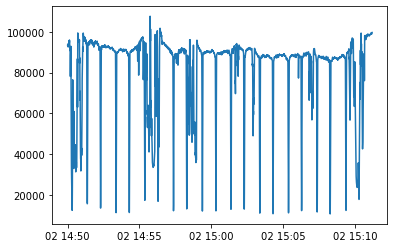

In [5]:
plt.plot(DS.time,DS.Es0)
# plt.plot(DS0.time,DS0.Es0)

In [44]:
CDS

<xarray.Dataset>
Dimensions:                    (channel: 19)
Coordinates:
  * channel                    (channel) int64 305 340 380 412 ... 1550 1640 0
Data variables:
    centroid_wvl               (channel) float64 297.4 340.4 ... 1.645e+03 0.0
    calibration_factor         (channel) float64 0.01972 0.03777 ... 0.03002
    calibration_factor_stored  (channel) float64 0.01905 0.03711 ... 0.03002
    signal_noise_ratio         (channel) float64 0.01972 0.03777 ... 0.03002

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot(DS2.time,DS2.Es305_corr.values/DS2.Es305.values,'b')
plt.plot(DS2.time,DS3.Es305.values/DS2.Es305.values,'g')
# plt.plot(DS3.time,DS3.Es305.values,'r:')
# axis=plt.axis()
# plt.axis([axis[0],axis[1],4,4.5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [2]:
DS3

<xarray.Dataset>
Dimensions:            (time: 18000)
Coordinates:
  * time               (time) datetime64[ns] 2018-06-02T14:50:00.037000 ... 2...
Data variables: (12/35)
    MeasurementMode    (time) int64 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    DateTimeLocal      (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    DateTimeUTC        (time) datetime64[ns] 2018-06-02T14:50:00 ... 2018-06-...
    Millisecond        (time) int64 37 109 170 259 298 ... 130 201 261 326 392
    EsRoll             (time) float64 -0.7689 -1.048 -0.699 ... -1.887 -1.957
    EsPitch            (time) float64 1.748 1.748 1.678 ... 1.468 1.608 1.818
    ...                 ...
    SolarZenithAngle   (time) float64 66.49 66.49 66.49 ... 70.74 70.74 70.74
    yaw                (time) float64 51.5 51.5 51.5 51.5 ... 53.0 53.03 53.09
    pitch              (time) float64 1.076 1.067 1.049 ... 1.017 1.056 1.095
    lon                (time) float64 -16.94 -16.94 -16.94 ... -16.89 -16.89
    lat                (time) float64 26.53 26.53 26.53 ... 26.57 26.57 26.57
    roll               (time) float64 0.4199 0.4209 0.4268 ... 0.2074 0.201
Attributes:
    pfx:      ps113

In [8]:
import xarray as xr

ds = xr.open_dataset("example-data/ancillary/ps113_INS_20180602.nc")

ds


<xarray.Dataset>
Dimensions:  (time: 18001)
Coordinates:
  * time     (time) datetime64[ns] 2018-06-02T14:45:00 ... 2018-06-02T15:15:00
Data variables:
    yaw      (time) float64 ...
    pitch    (time) float64 ...
    lon      (time) float64 ...
    lat      (time) float64 ...
    roll     (time) float64 ...
Attributes:
    Instrument:      Polarstern_Hydrins
    License:         For non-commercial use only.
    Title:           Data of inertial navigation system (INS) measured during...
    Author:          Jonas Witthuhn (witthuhn@tropos.de)
    Conventions:     CF-1.7, if possible
    Source:          Product derived from GUVis - ShRad(1.0)
    Contact_person:  Hartwig Deneke plus satellite group, sat@tropos.de
    Institution:     Leibniz Institute for Tropospheric Research (TROPOS), Le...
    History:         Data file generated at ps113 at 2018-10-23 06:22:31 Z by...

In [ ]:
ds.

In [6]:

len(np.unique([1,1]))


1

In [9]:
import configparser
CONFIG = configparser.ConfigParser(interpolation=configparser.ExtendedInterpolation)
CONFIG.read("ConfigFile.ini")

TypeError: before_read() missing 1 required positional argument: 'value'

In [2]:
import xarray as xr
import numpy as np
import datetime as dt

ins = xr.open_dataset("../shrad-data/ancillary/ps113_INS_20180602.nc")
ins1 = ins.copy()
for attr in ['long_name','standard_name','valid_range','units','calendar']:
    ins1['time'].attrs.pop(attr)
ins1.time.values = np.datetime64("1970-01-01")+(ins1.time.values*1000.).astype('timedelta64[ms]')


ins1 = ins1.swap_dims({'t':'time'})
ins1 = ins1.where((ins1.time>=np.datetime64("2018-06-02T14:45")),drop=True)
ins1 = ins1.where((ins1.time<=np.datetime64("2018-06-02T15:15")),drop=True)

encoding = {}
for var in ins1.keys():
    print(var)
    encoding.update({var:{'zlib':True}})
    ins1[var].attrs.pop('valid_range')
    if not var in ['lat','lon']:
        ins1[var].attrs.pop('notes')
        

ins1['pitch'].attrs.update({'standard_name':"platform_pitch_fore_up"})
ins1['roll'].attrs.update({'standard_name':"platform_roll_starboard_down"})
ins1['yaw'].attrs.update({'standard_name':"platform_yaw_fore_starboard",
                          'long_name':"platform_yaw_angle_positive_clockwise_from_bow"})

ins1
ins1.to_netcdf("example-data/ancillary/ps113_INS_20180602.nc",encoding=encoding)

[autoreload of modules.utils failed: Traceback (most recent call last):
  File "/home/walther/anaconda3/envs/shrad/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/walther/anaconda3/envs/shrad/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/walther/anaconda3/envs/shrad/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/walther/anaconda3/envs/shrad/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_w

yaw
pitch
lon
lat
roll


In [8]:
ins.Instrument

'Polarstern_Hydrins'

In [12]:
import xarray as xr
import numpy as np
import datetime as dt

ds = xr.open_dataset("../shrad-data/ancillary/ps113_MET_20180602.nc")
ds1 = ds.copy()
for attr in ['long_name','standard_name','valid_range','units','calendar']:
    ds1['time'].attrs.pop(attr)
ds1.time.values = np.datetime64("1970-01-01")+(ds1.time.values*1000.).astype('timedelta64[ms]')


ds1 = ds1.swap_dims({'t':'time'})
ds1 = ds1.where((ds1.time>=np.datetime64("2018-06-02T14:45")),drop=True)
ds1 = ds1.where((ds1.time<=np.datetime64("2018-06-02T15:15")),drop=True)


ds2 = xr.Dataset({'P':('time',ds1.P.data*100.),
                  'T':('time',ds1.T.data+273.15),
                  'RH':('time',ds1.RH.data/100.)},
                 coords={'time':('time',ds1.time.data)})

ds2['P'].attrs.update({'units':'Pa',
                       'standard_name':'air_pressure'})
ds2['T'].attrs.update({'units':'K',
                       'standard_name':'air_temperature'})
ds2['RH'].attrs.update({'units':'1',
                        'standard_name':"relative_humidity"})
                       
encoding = {}
for var in ds2.keys():
    print(var)
    encoding.update({var:{'zlib':True}})
        

ds2.to_netcdf("example-data/ancillary/ps113_MET_20180602.nc",encoding=encoding)
ds2

P
T
RH


[autoreload of modules.utils failed: Traceback (most recent call last):
  File "/home/walther/anaconda3/envs/shrad/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/walther/anaconda3/envs/shrad/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/walther/anaconda3/envs/shrad/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/walther/anaconda3/envs/shrad/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_w

<xarray.Dataset>
Dimensions:  (time: 31)
Coordinates:
  * time     (time) datetime64[ns] 2018-06-02T14:45:00 ... 2018-06-02T15:15:00
Data variables:
    P        (time) float64 1.02e+05 1.02e+05 1.02e+05 ... 1.02e+05 1.02e+05
    T        (time) float64 292.0 292.1 292.1 292.0 ... 292.1 292.1 291.9 291.9
    RH       (time) float64 0.72 0.73 0.73 0.73 0.73 ... 0.75 0.75 0.73 0.73

In [13]:
ds

<xarray.Dataset>
Dimensions:  (t: 1438)
Dimensions without coordinates: t
Data variables:
    WD_tru   (t) float64 ...
    WD_rel   (t) float64 ...
    P        (t) float64 ...
    WV_tru   (t) float64 ...
    T        (t) float64 ...
    time     (t) float64 ...
    RH       (t) float64 ...
    WV_rel   (t) float64 ...
Attributes:
    Instrument:      Polarstern_Weatherstation
    License:         For non-commercial use only.
    Title:           Meteorological data measured close to shadow band radiom...
    Author:          Jonas Witthuhn (witthuhn@tropos.de)
    Conventions:     CF-1.7, if possible
    Source:          Product derived from GUVis - ShRad(1.0)
    Contact_person:  Hartwig Deneke plus satellite group, sat@tropos.de
    Institution:     Leibniz Institute for Tropospheric Research (TROPOS), Le...
    History:         Data file generated at ps113 at 2018-10-23 06:22:31 Z by...

In [65]:
a=['a','b','c']
b=['a','b','c','d']
c = ['a','c','e']
if all(ai in c for ai in a):
    print(True)
required_vars=a
print(f"The INS data given did not have all required variables ({required_vars})!")

The INS data given did not have all required variables (['a', 'b', 'c'])!


In [8]:
ins.pitch


<xarray.DataArray 'pitch' (t: 863999)>
[863999 values with dtype=float64]
Dimensions without coordinates: t
Attributes:
    notes:          Some INS-systems may define the pitch angle 'bow_down', b...
    long_name:      platform_pitch_angle_positive_bow_up
    standard_name:  platform_pitch_angle
    units:          degrees
    valid_range:    [     0. 360000.]